<a href="https://colab.research.google.com/github/mhmd2015/ImageProcessing1UIC/blob/main/DIP_UIC_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Basic Image Processing Using Python

In this experiment, we will do some basic image processing and image manipulations using python.

We will use numpy, opencv and matplotlib libraries for this purpose.

First download the image “boat.png” (or use the image in Appendix 1) and save it in a directory.


Open the command prompt, navigate to the directory in which you saved the image. You may use “cd” command for this purpose.

Once in the directory, type “Python” + Enter to start python
Now import the libraries that you need as follows:


In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


(763, 950)


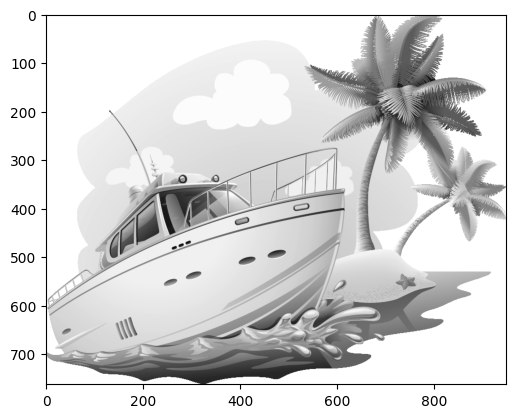

In [2]:
#We read the image using the following lines:
img =  cv.imread("boat.png", cv.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img, cmap='gray')
plt.show()


The command “cv.imread” reads the image from disk into a numpy array. The previous lines read the image, print its size and display the image on screen.
Now that we have the image read, we will do some basic image processing over the image.
But first we need to convert the image from type “uint8” into”float32” and normalize it by 255. To do so, write the following:


In [3]:
img = img.astype(np.float32)/255.

In order to verify that the conversion is correct, display the image as above, you should see the same image.

(763, 950)


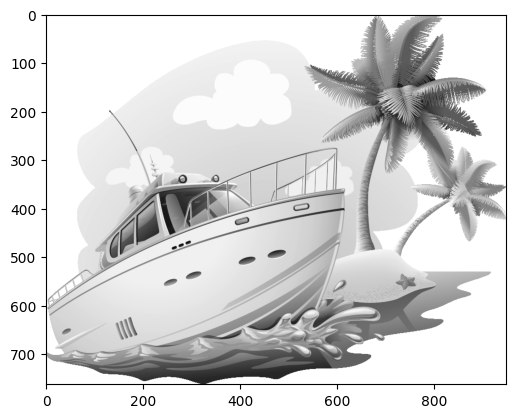

In [4]:
#to make sure that the size of the image is still the same after the conversion to 32bit
print(img.shape)

#then simple display the image
plt.imshow(img, cmap='gray')
plt.show()



# 1)
Print the value of the pixel at location (132,112)



In [5]:
#because the img is an array
print(img[132,112])

1.0


# 2)
Display only the top-left quarter of the image, you can use 2-D slicing as follows: x[a:b,a:b], determine the values for a and b for that purpose.


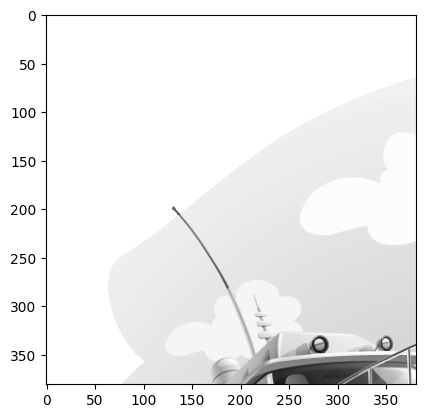

In [6]:
a=0;
b = int(img.shape[0]/2)
plt.imshow(img[a:b,a:b], cmap='gray')
plt.show()

# 3)
We will now implement linear filtering.

First let’s filter the image using a 3-by-3 moving average “box” filter, we can create the filter as follows:

Ma = 1./9.*np.array([[1.,1.,1.,],[1.,1.,1.],[1.,1.,1.,]])

Notice that we use double parentheses since we have two dimensions, we have three in the inner parentheses, we create vectors of size 1-by-3 ([1.,1.,1.,]).

The outer parentheses create a 2-D matrix out of these 3 1-by-3 vectors (thus a 3-by-3) matrix.

## We now need to perform  two-dimensional (2-D) convolution.

First read the documentation of scipy’s convolve2d function on the following link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

We import the function “convolve2d” and use it to convolve the image with the moving average filter “ma”

In [9]:
from scipy.signal import convolve2d



In [20]:
ma = 1./9.*np.array([[1.,1.,1.,],[1.,1.,1.],[1.,1.,1.,]])

In [21]:
img_filtered = convolve2d(img, ma)

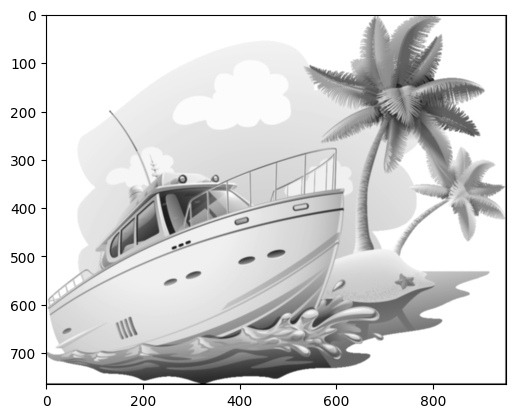

In [22]:
plt.imshow(img_filtered, cmap='gray')
plt.show()

What is the size of the new image? Display the filtered image and comment on how it visually compares with the original “boat” image.

In [23]:
print("Original size",img.shape)
print("Size after applied convolve2d",img_filtered.shape)

Original size (763, 950)
Size after applied convolve2d (765, 952)



# 4)
Let’s save the image to the harddisk of your computer. To do so, we use opencv’s imwrite command as follows:


In [27]:
print(img)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [25]:
cv.imwrite("boat_convolve2d.png", img_filtered)

True

Make sure that you saved the image correctly; look up the image on your computer, and make sure that it looks like the image you displayed. As you know the moving average box filter is a low-pass filter and it only smooths the edges of the image.


# 5)
Now create a 3-by-3 difference filter, with the first row being [1,0,-1], the second row [2,0,-2] and the last row should be [1,0,-1]). In order to verify that you obtained the desired filter with the correct order, print the filter on screen.
Convolve this filter with the original “boat” image using convolve2d. Display the image and comment on it.

Notice that the output image pixel values no longer between 0 and 1. You should add 0.5 to output pixels before displaying.


In [42]:
df = np.array([[1.,0.,-1.],[2.,0.,-2.],[1.,0.,-1.,]])
print(df)

[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]


In [43]:
img_dif = convolve2d(img, df)

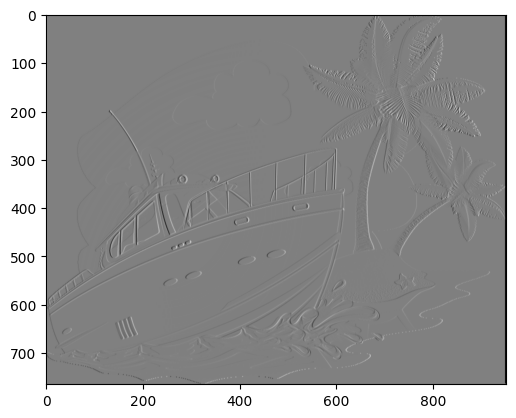

In [44]:
img_dif=img_dif + .5
plt.imshow(img_dif, cmap='gray')
plt.show()

# 6)
Detect the horizontal edges of the image, using the filter [-1 2 -1]. Display your output image to verify your result and upload it to BB as a part of your report.

In [57]:

edge = np.array([[-1.,2.,-1.],[-1.,2.,-1.],[-1.,2.,-1.]])
print(edge)

[[-1.  2. -1.]
 [-1.  2. -1.]
 [-1.  2. -1.]]


In [58]:
img_edge = convolve2d(img, edge)

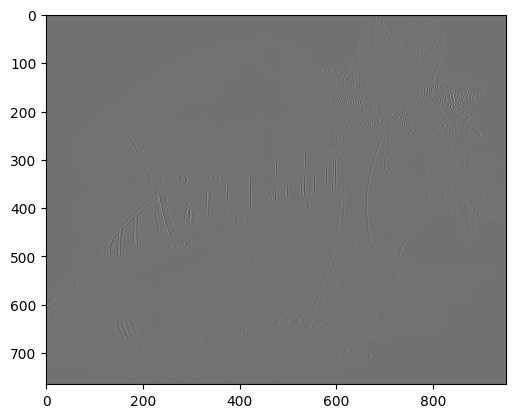

In [59]:
img_edge = img_edge * 1.5
plt.imshow(img_edge, cmap='gray')
plt.show()




# 7)
Detect the vertical edges of the image using the filter [-1 2 -1]T. Display your output image and upload it to BB as a part of your report.



In [60]:
vedge = np.array([[-1.,-1,-1.],[2.,2.,2.],[-1.,-1.,-1.]])
print(vedge)

[[-1. -1. -1.]
 [ 2.  2.  2.]
 [-1. -1. -1.]]


In [61]:
img_edge = convolve2d(img, vedge)

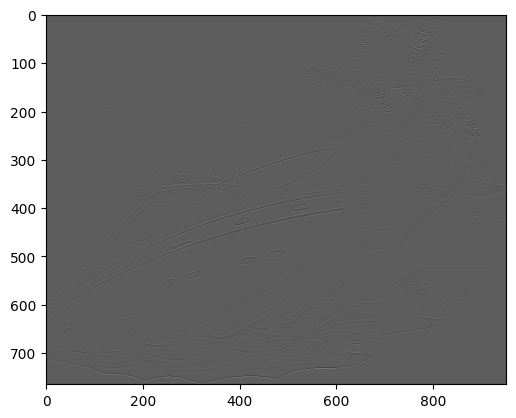

In [62]:
img_edge = img_edge * 1.5
plt.imshow(img_edge, cmap='gray')
plt.show()


# 8)
Repeat the above experiments with the color image “Barbara”. Notice that Barbara is in JPEG format and it is a color image. So you have to filter the red, green and blue color planes of Barbara image.

Notice that opencv read images in BGR format, in contrast to RGB format. Therefore, the first channel is blue, then green, and finally the red channel.
In order to work in RGB format, you need to modify the imread function as follows:


In [ ]:
img = cv.imread("Barbara.jpeg")
Img =cv.cvtColor(img, cv.COLOR_BGR2RGB)


Notice that imwrite assumes BGR format, so if you work in RGB format, you need to go back to BGR format before saving the image.